In [ ]:
#from tensorflow tutorials available online

In [13]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [4]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


In [5]:
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)


Epoch 1/6
469/469 [==============================] - 10s 7ms/step - loss: 0.3537 - sparse_categorical_accuracy: 0.9021 - val_loss: 0.1938 - val_sparse_categorical_accuracy: 0.9451
Epoch 2/6
469/469 [==============================] - 2s 4ms/step - loss: 0.1641 - sparse_categorical_accuracy: 0.9530 - val_loss: 0.1374 - val_sparse_categorical_accuracy: 0.9602
Epoch 3/6
469/469 [==============================] - 2s 5ms/step - loss: 0.1185 - sparse_categorical_accuracy: 0.9660 - val_loss: 0.1110 - val_sparse_categorical_accuracy: 0.9667
Epoch 4/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0919 - sparse_categorical_accuracy: 0.9735 - val_loss: 0.0959 - val_sparse_categorical_accuracy: 0.9701
Epoch 5/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0743 - sparse_categorical_accuracy: 0.9786 - val_loss: 0.0897 - val_sparse_categorical_accuracy: 0.9714
Epoch 6/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0617 - sparse_categorical_acc

In [6]:
predictions = model.predict(ds_test.take(1))

1/1 [==============================] - 0s 152ms/step


In [7]:
predicted_labels = tf.argmax(predictions, axis=1).numpy()

print("Predicted Labels:", predicted_labels)

Predicted Labels: [2 0 4 8 7 6 0 6 3 1 8 0 7 9 8 4 5 3 4 0 6 6 3 0 2 3 6 6 7 4 0 3 8 2 5 4 2
 5 5 8 5 2 9 2 4 2 7 0 5 1 0 7 9 9 9 6 5 8 8 6 9 9 5 4 2 6 8 1 0 6 9 5 5 4
 1 6 7 5 2 9 0 6 4 4 2 8 7 8 3 0 9 0 1 1 9 4 5 9 1 6 6 0 7 7 8 4 8 8 1 8 0
 2 9 1 0 3 9 7 0 4 9 6 8 9 3 5 4 3]


4/4 [==============================] - 0s 3ms/step


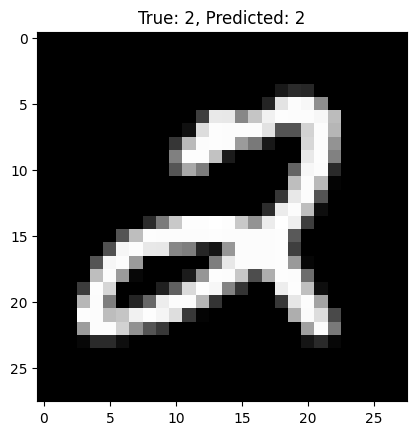

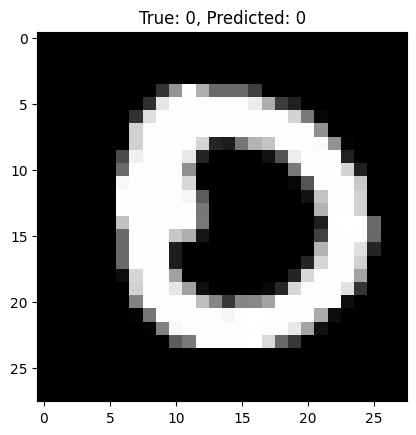

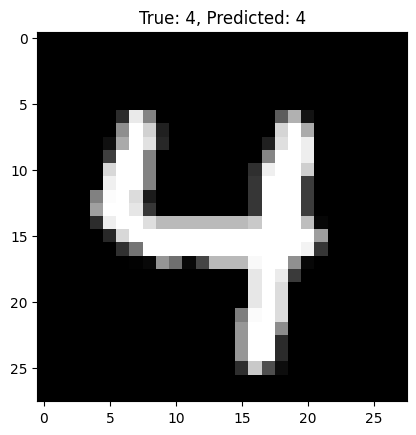

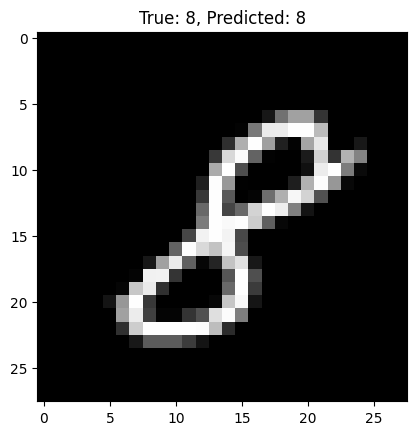

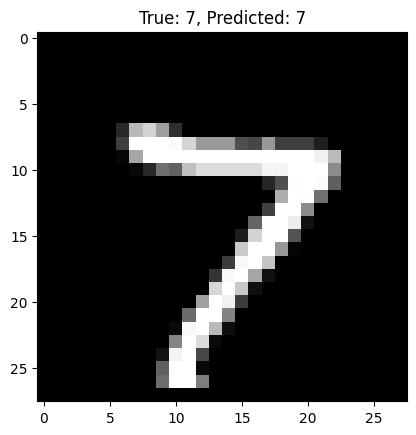

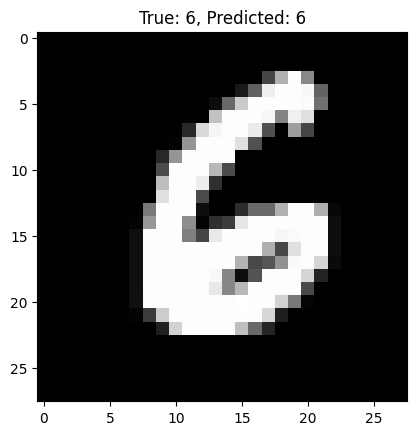

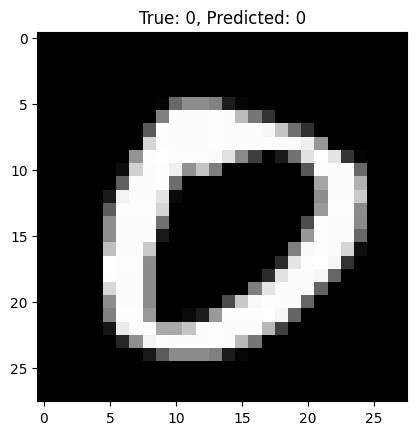

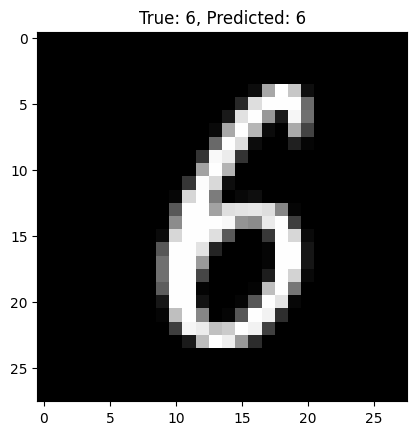

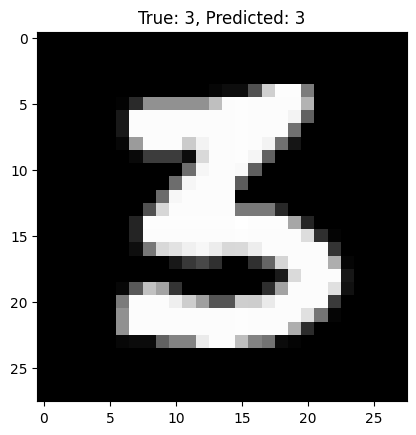

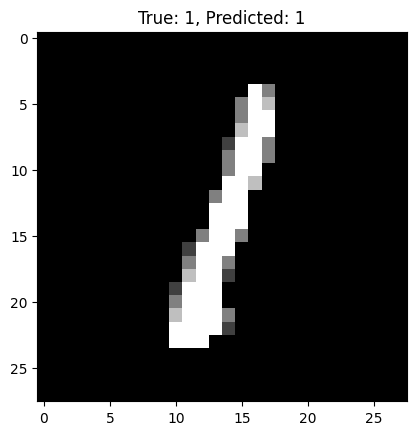

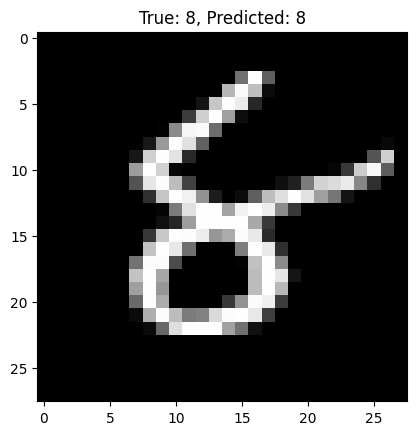

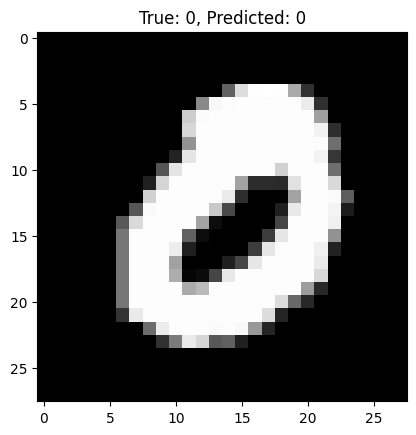

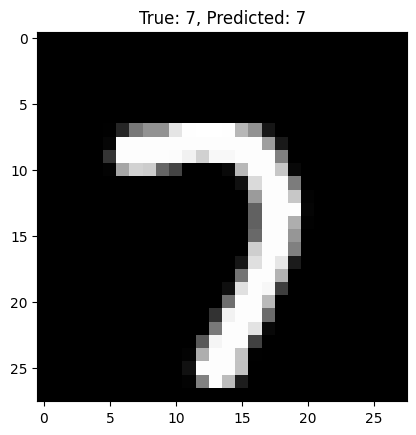

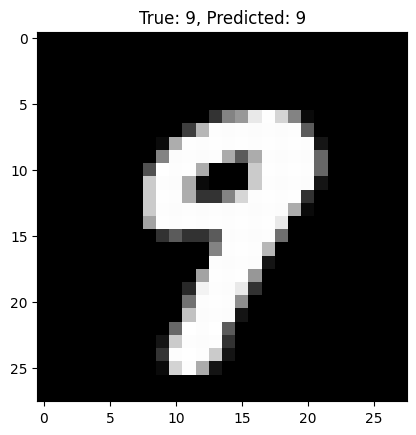

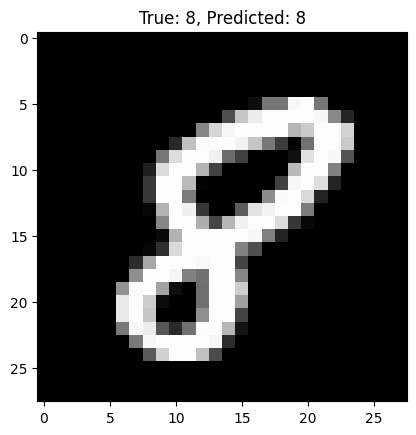

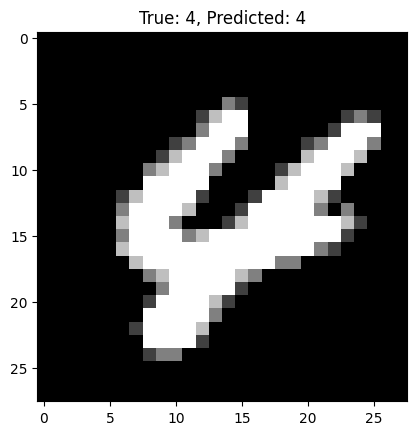

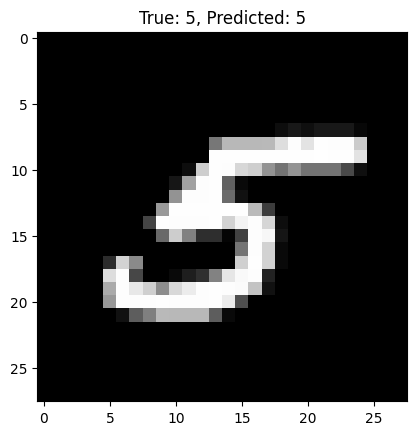

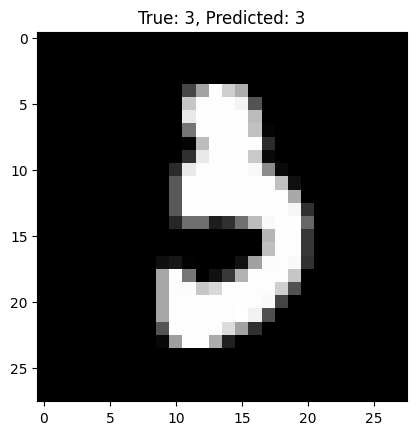

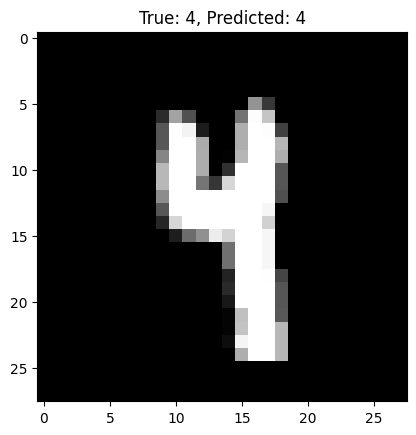

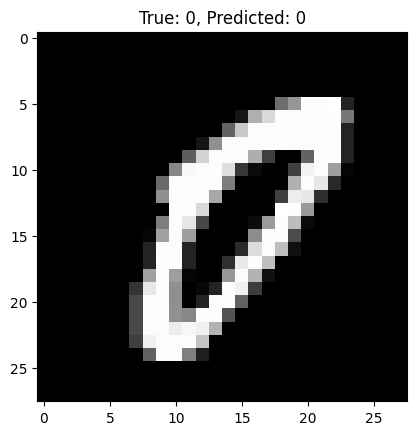

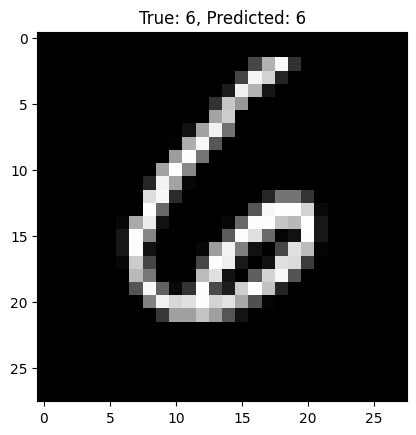

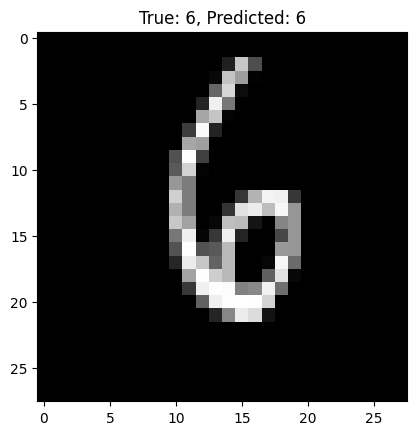

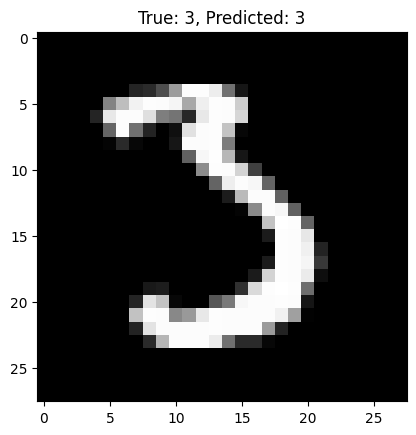

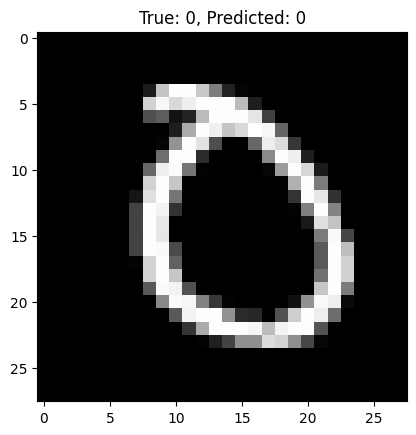

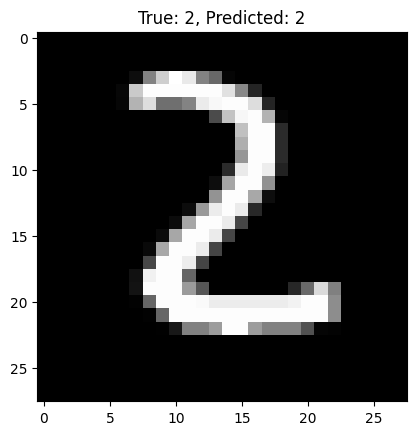

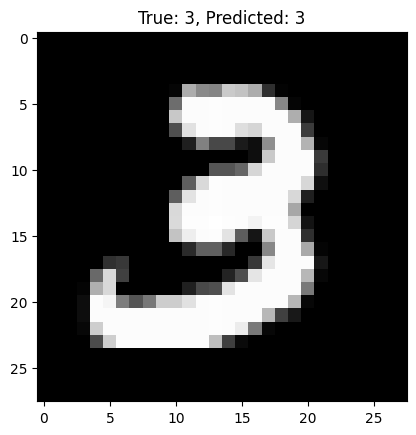

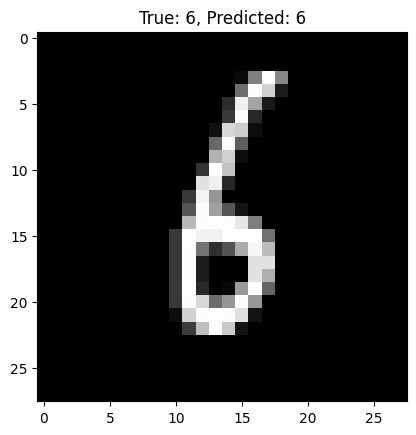

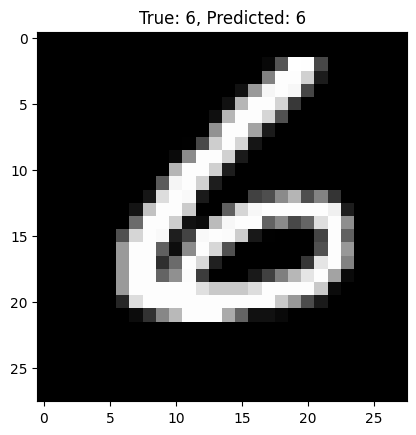

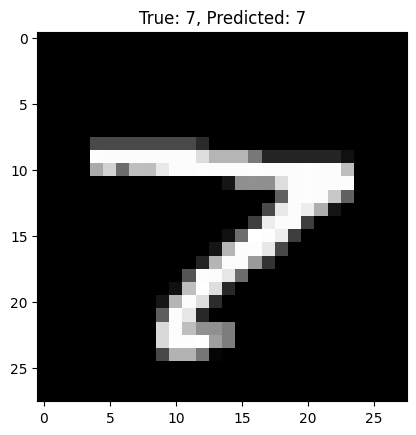

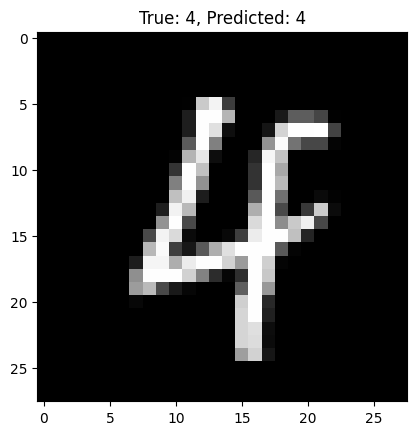

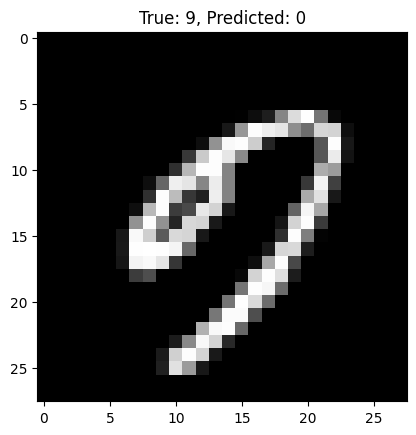

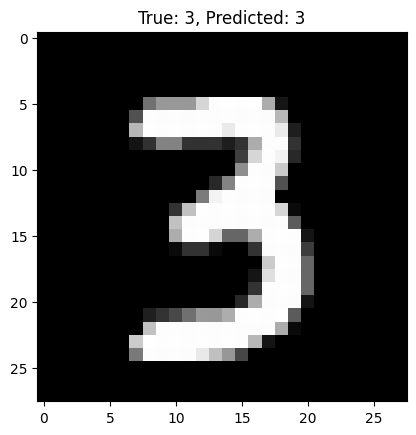

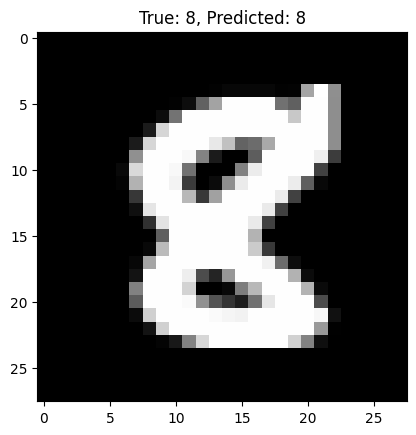

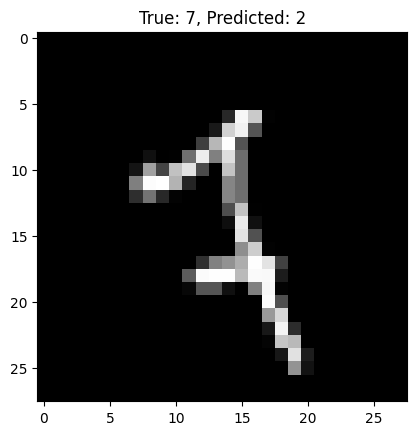

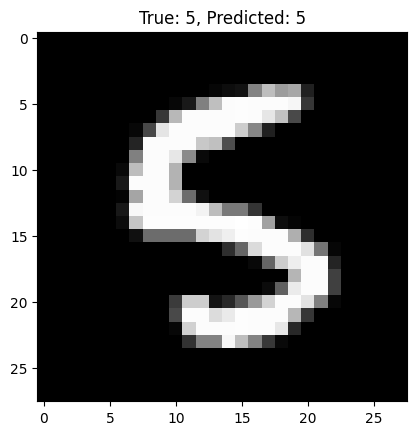

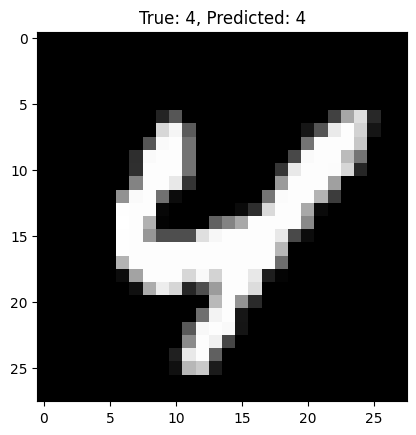

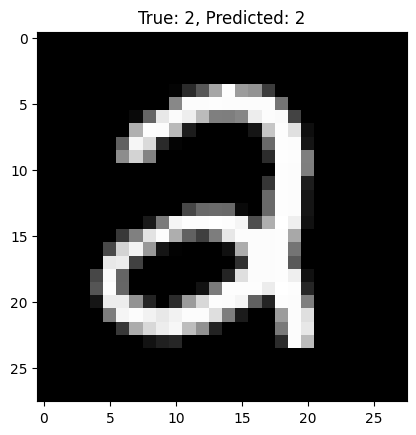

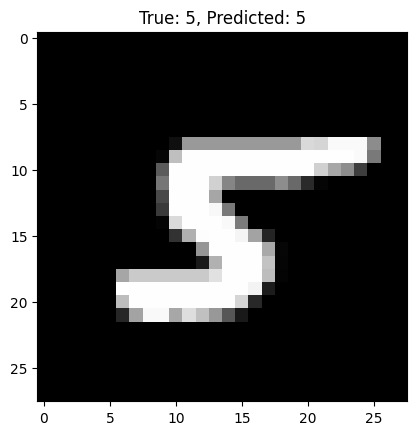

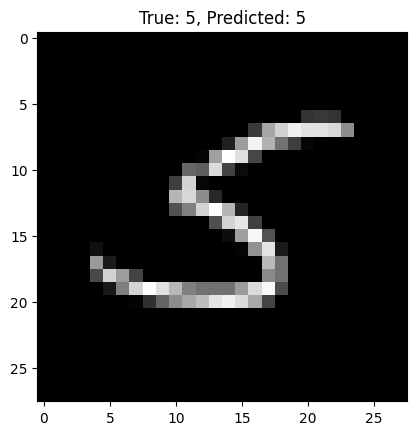

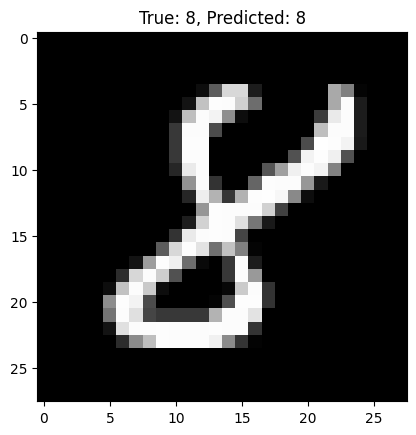

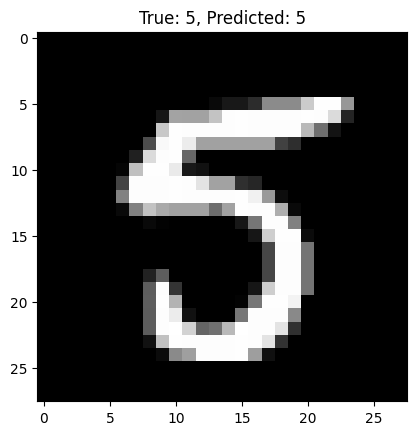

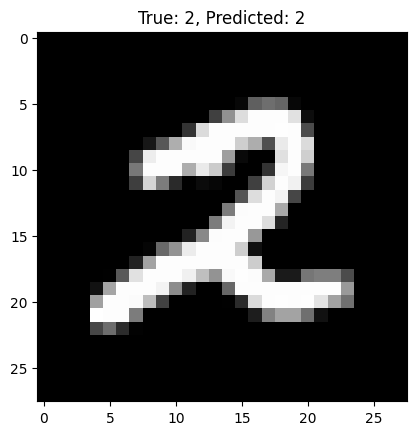

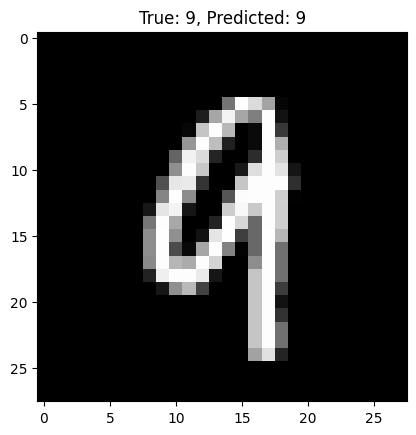

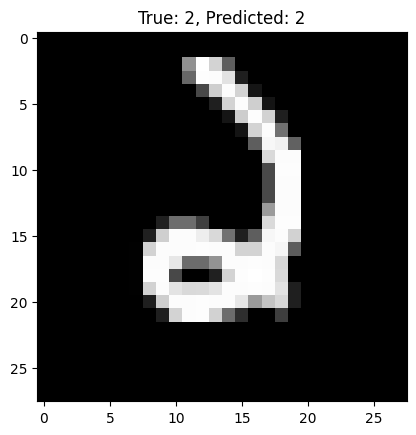

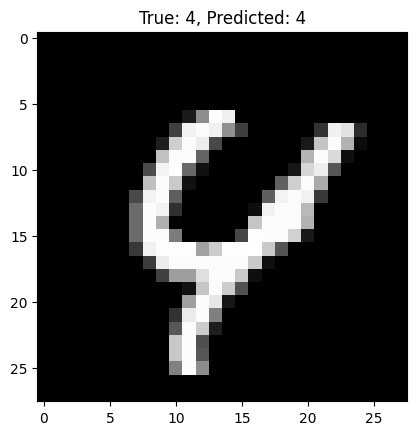

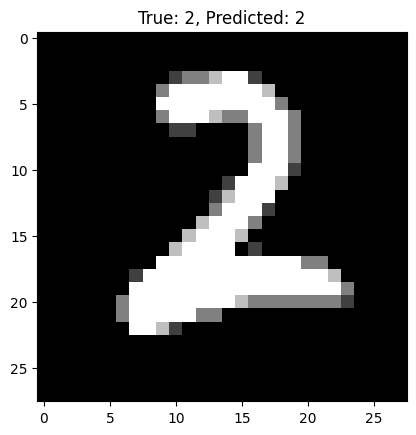

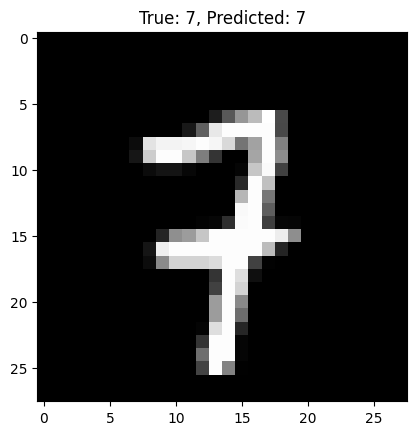

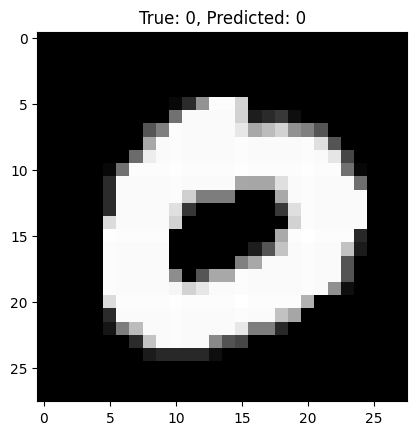

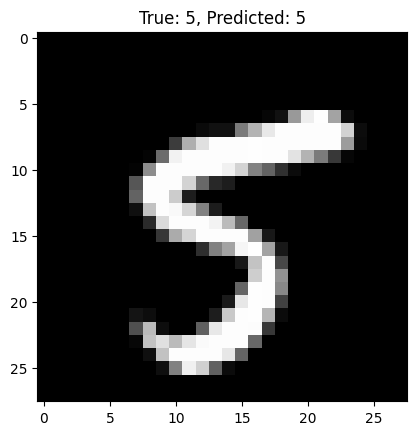

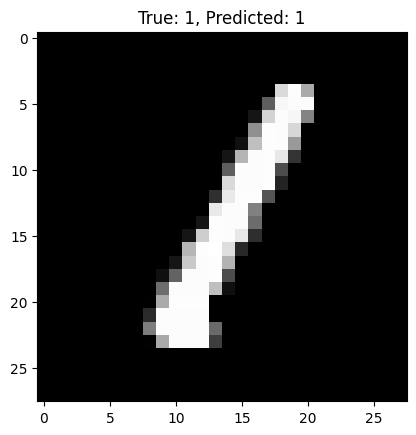

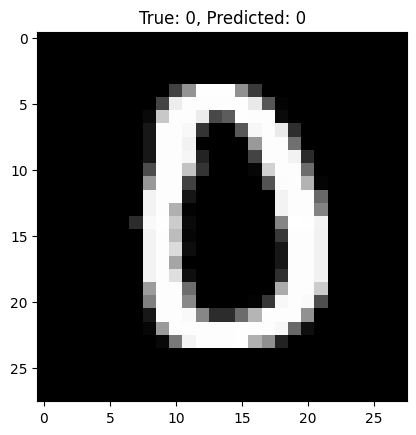

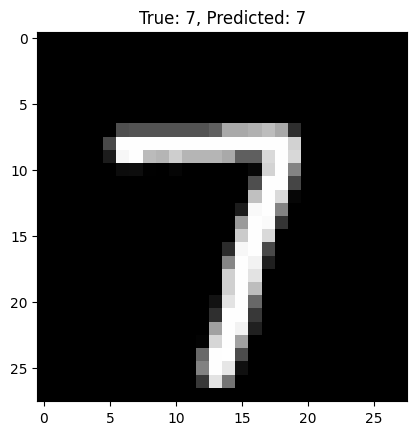

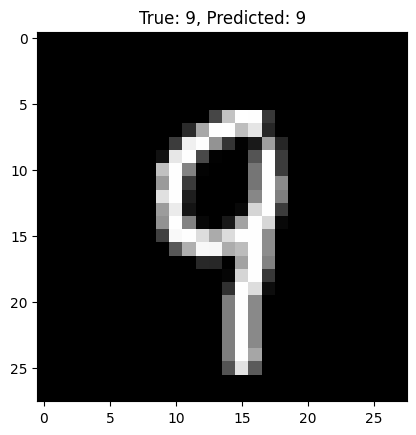

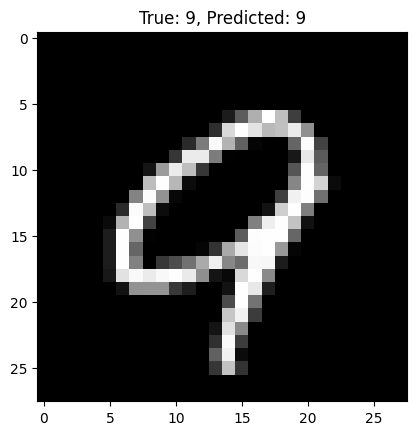

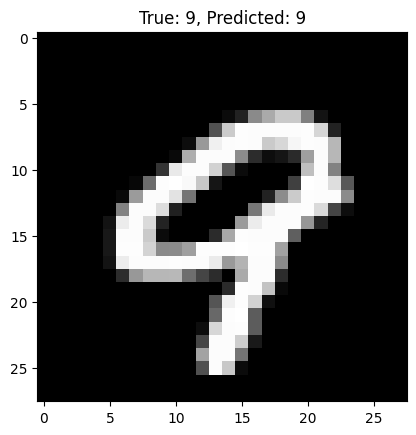

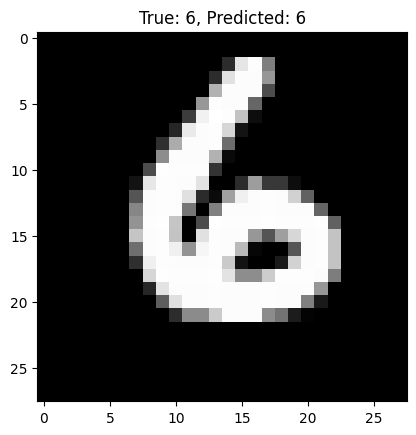

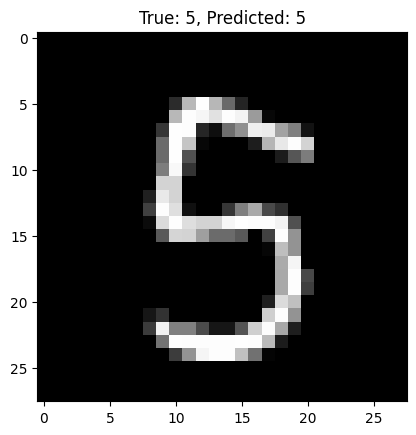

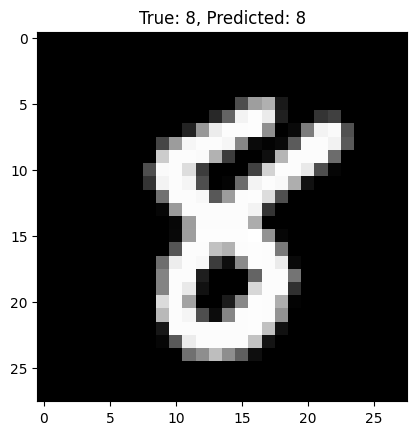

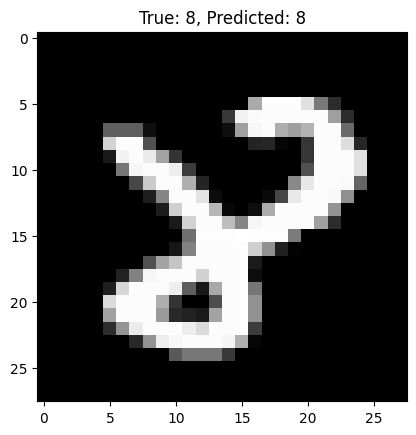

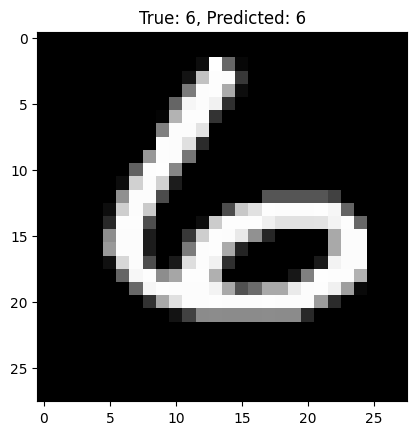

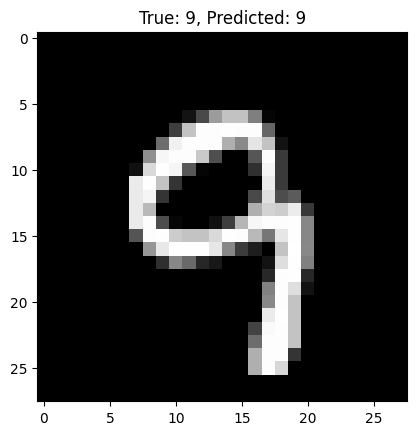

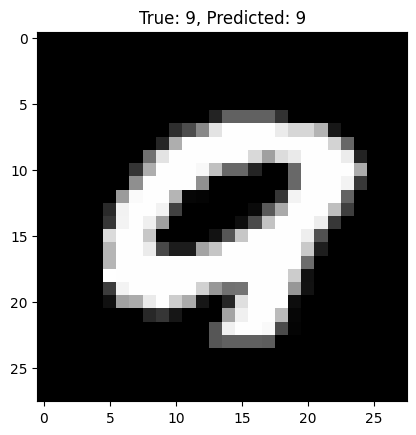

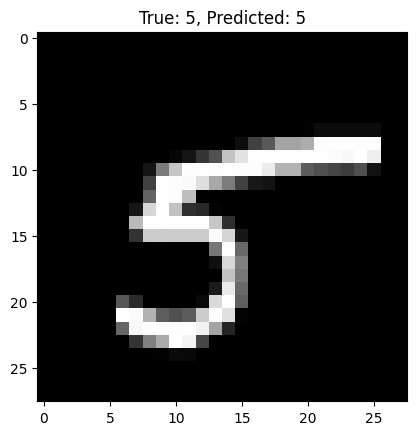

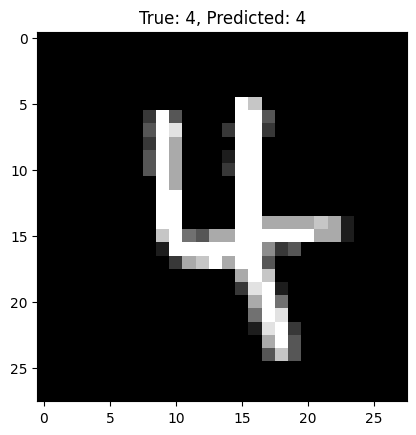

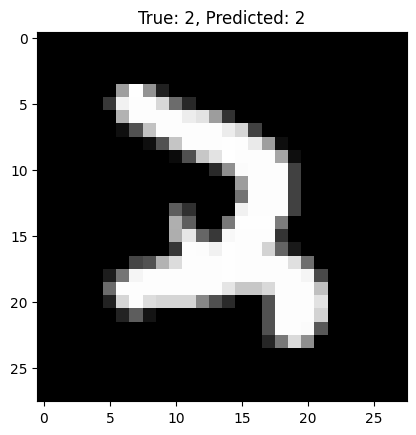

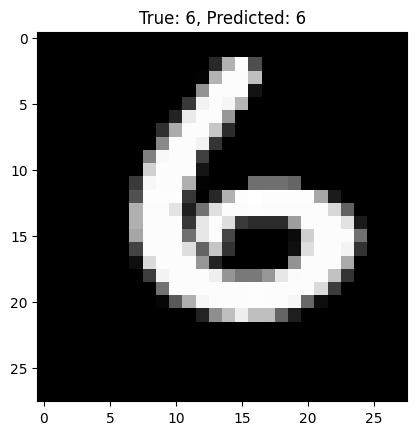

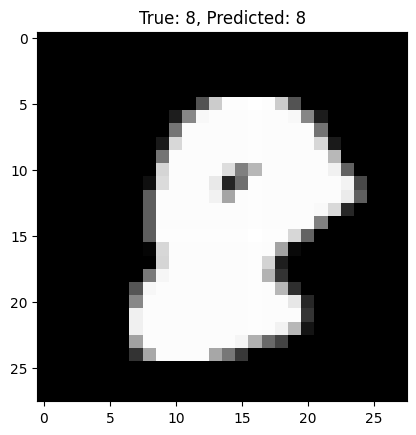

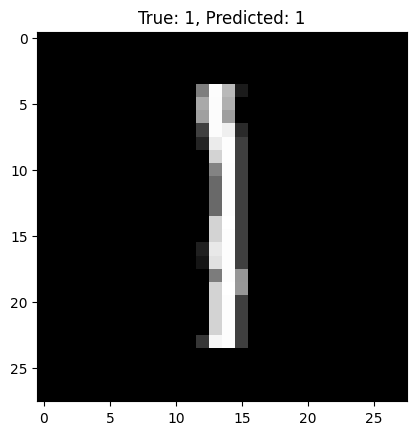

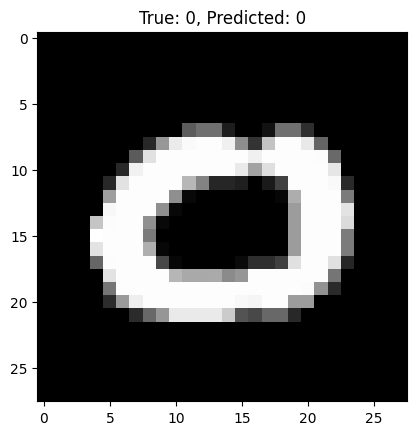

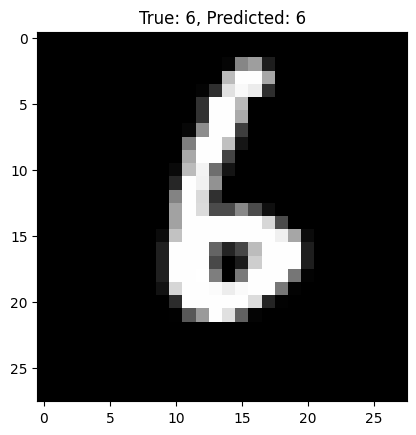

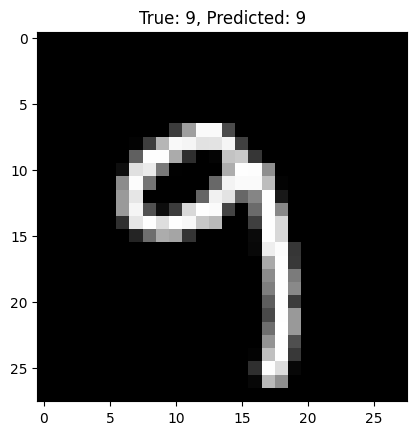

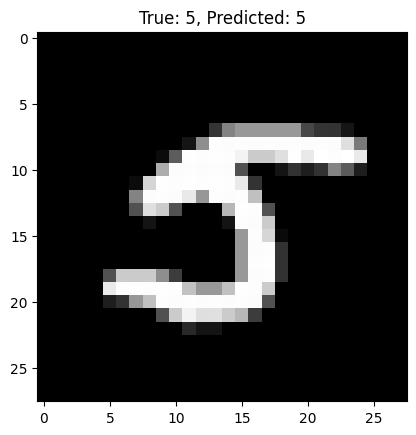

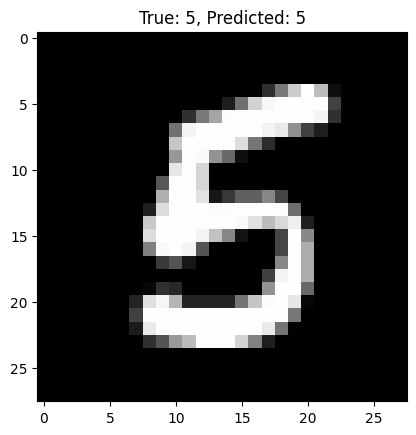

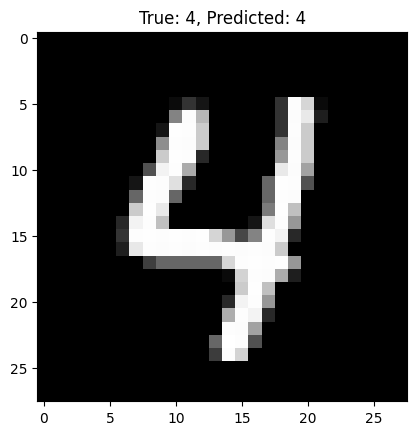

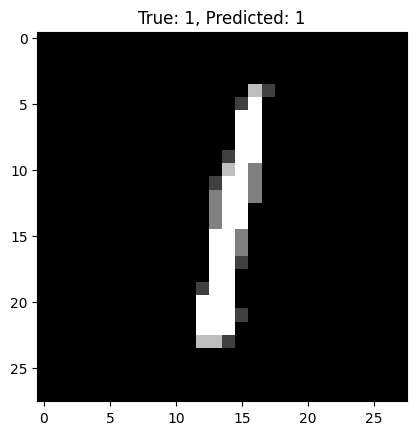

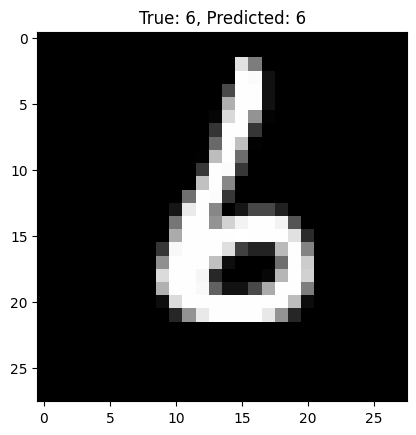

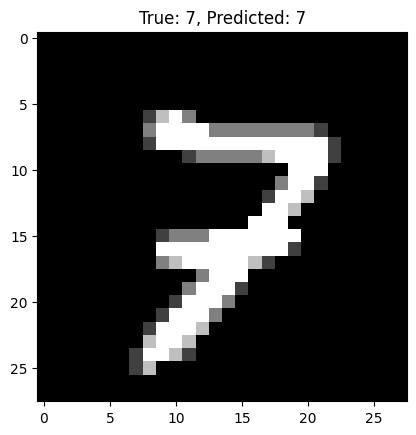

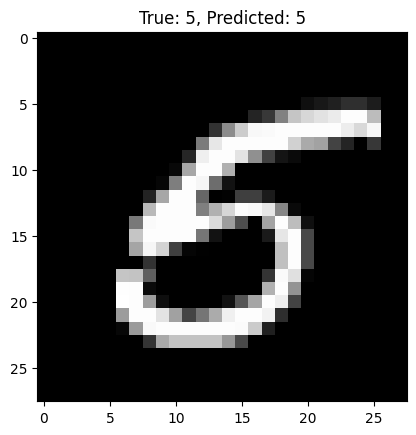

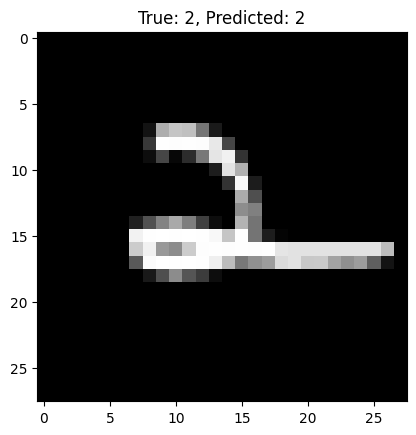

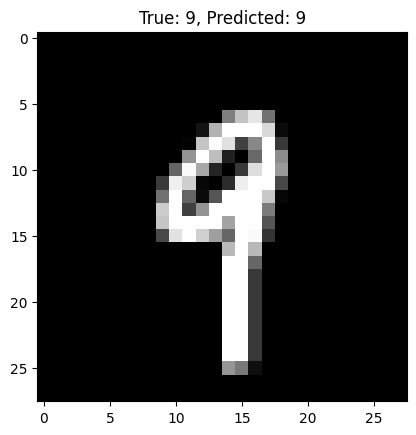

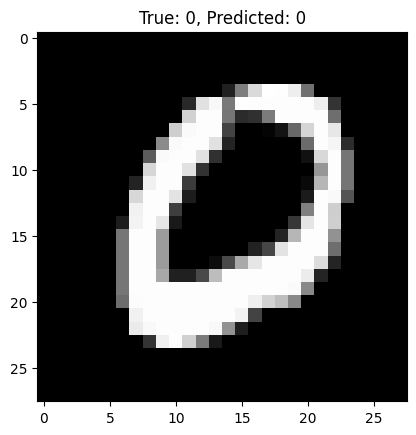

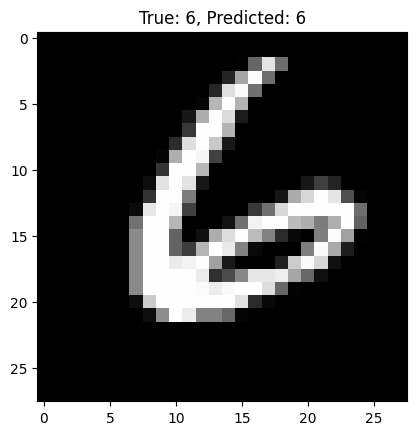

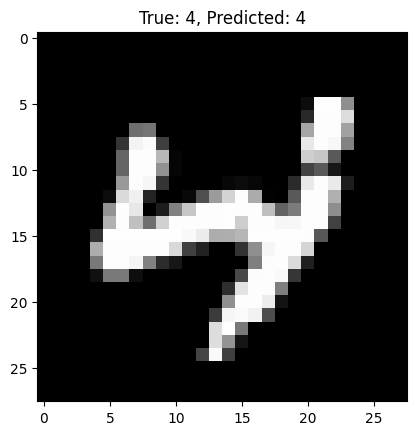

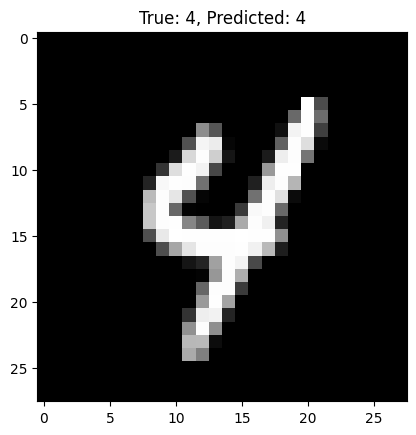

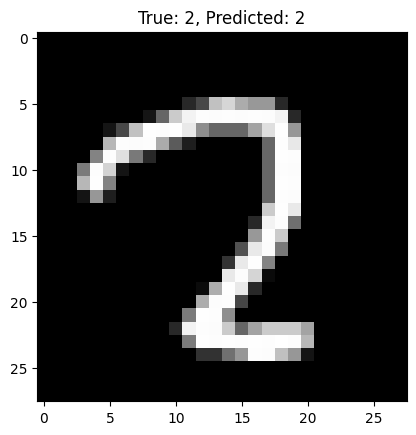

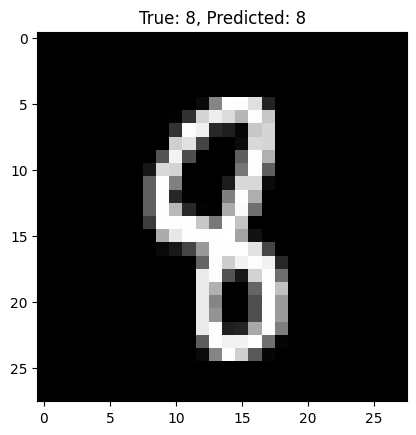

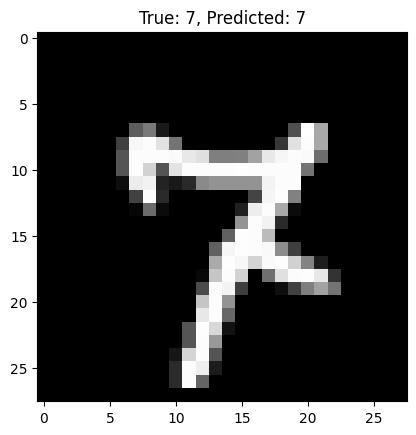

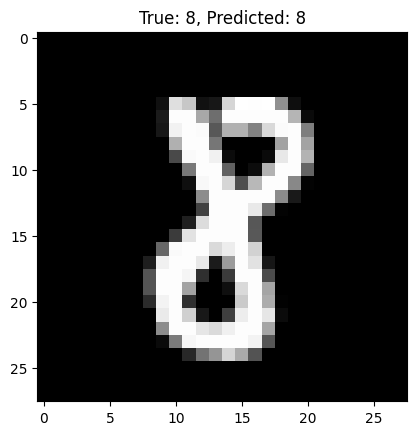

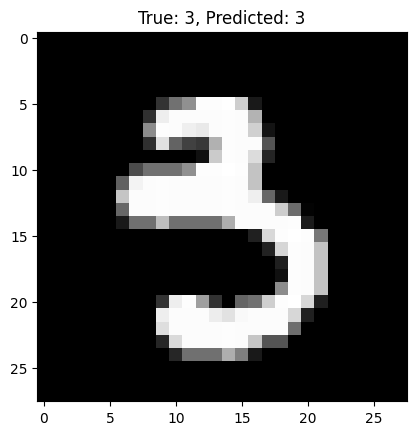

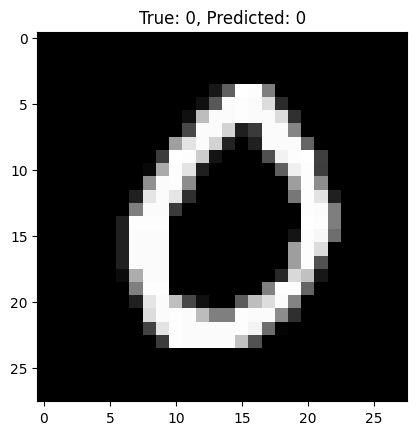

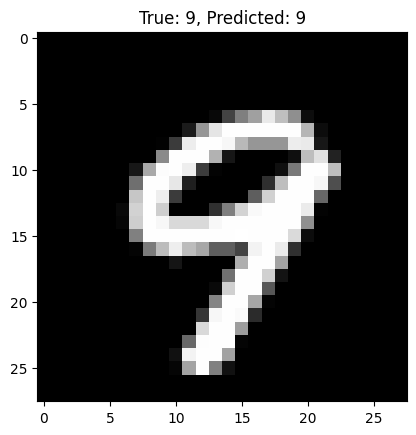

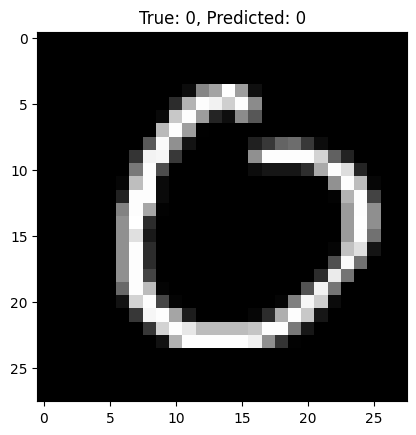

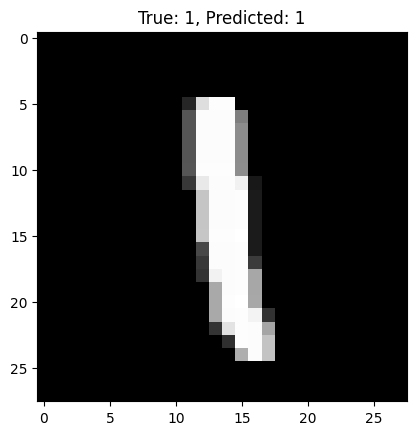

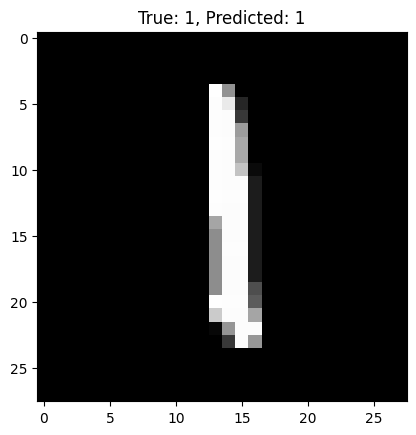

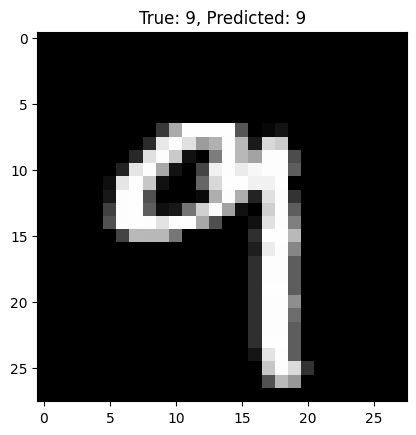

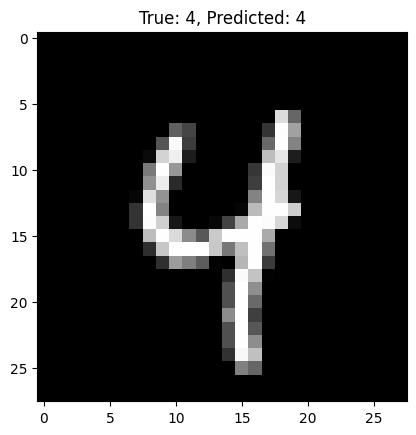

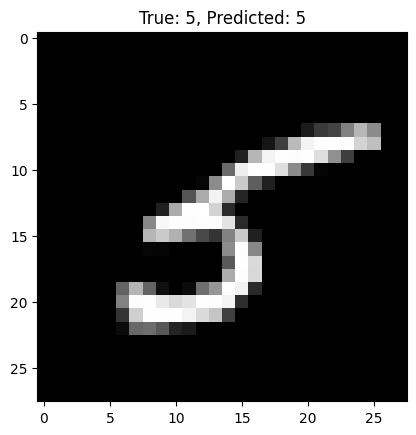

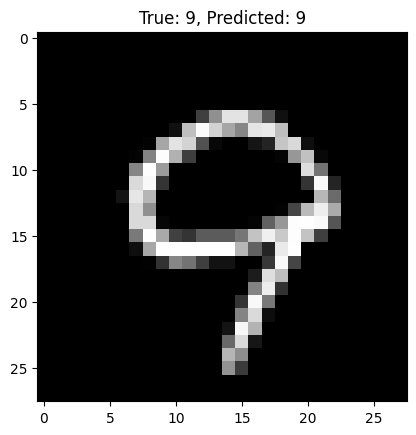

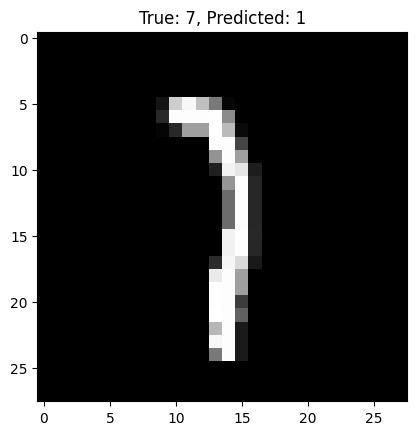

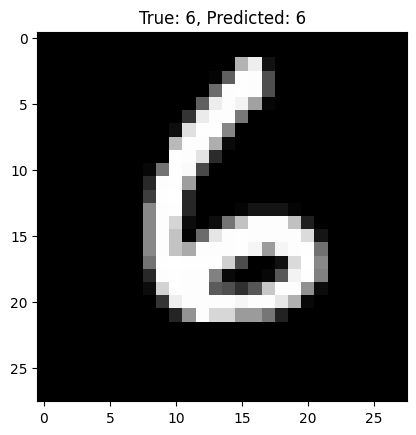

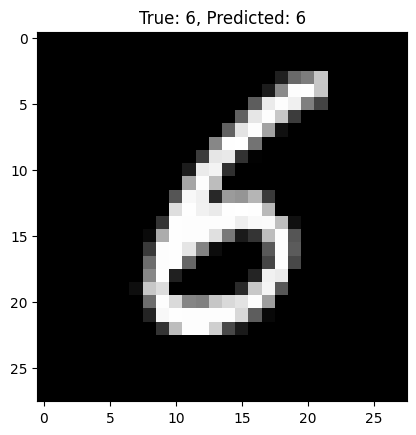

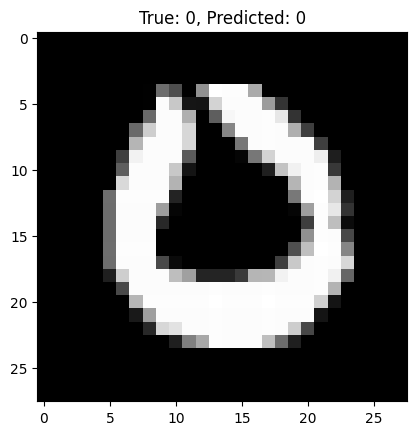

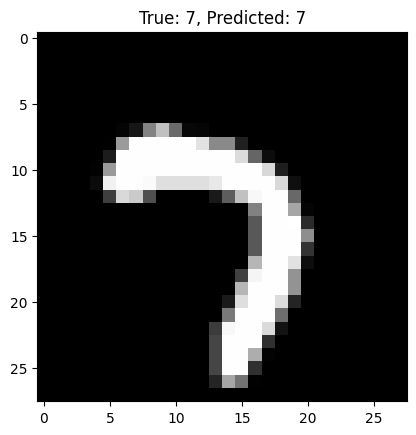

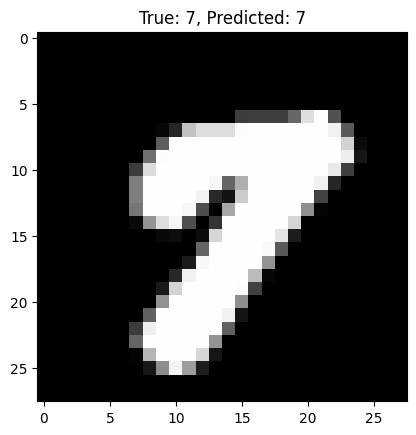

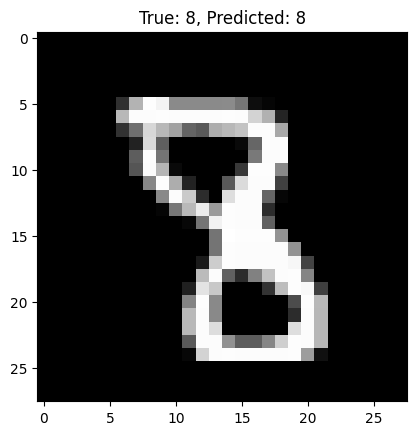

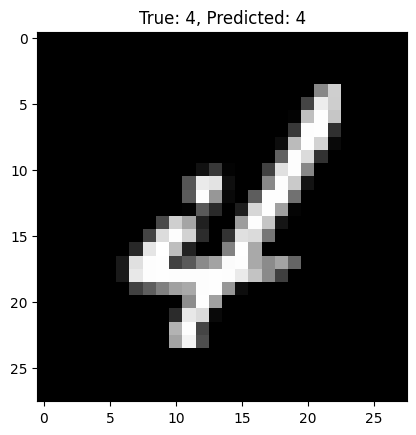

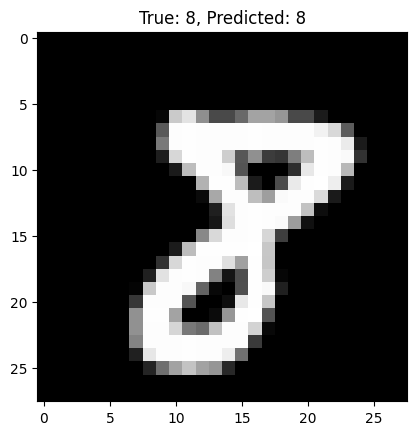

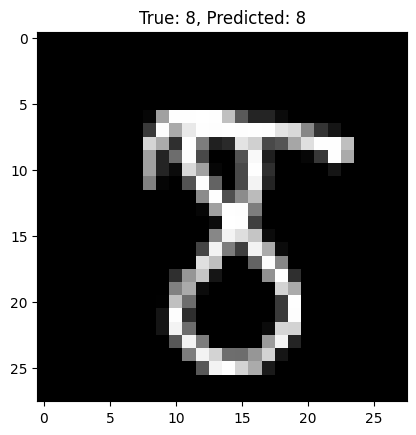

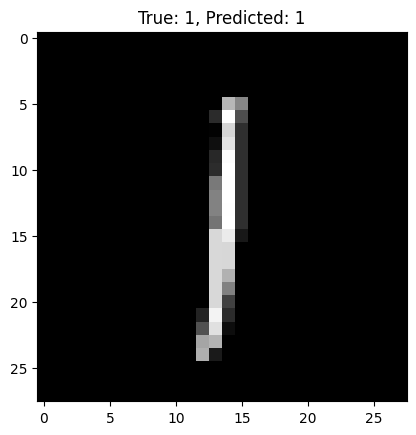

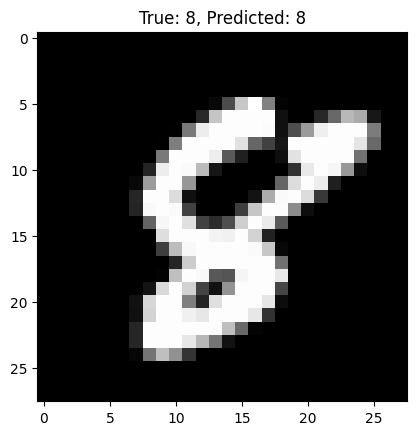

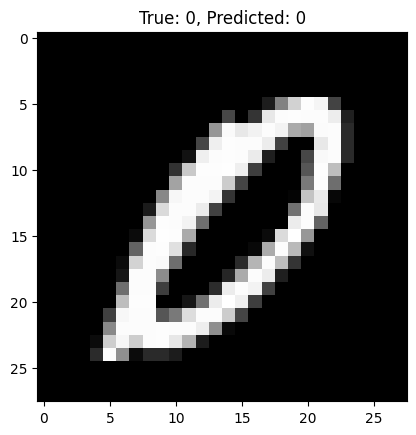

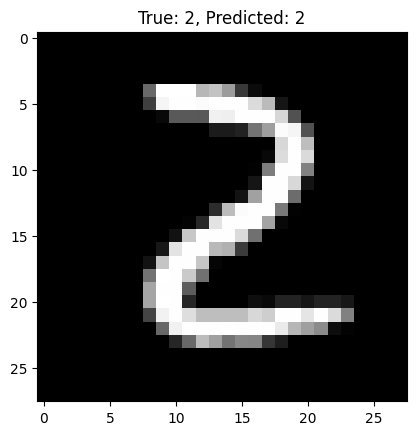

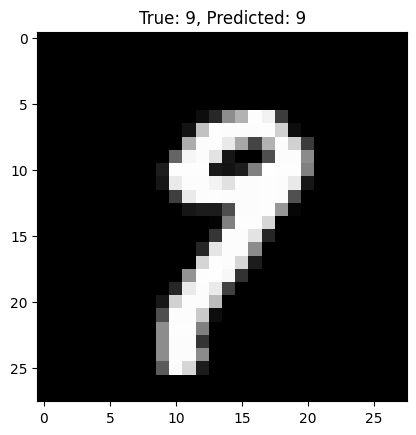

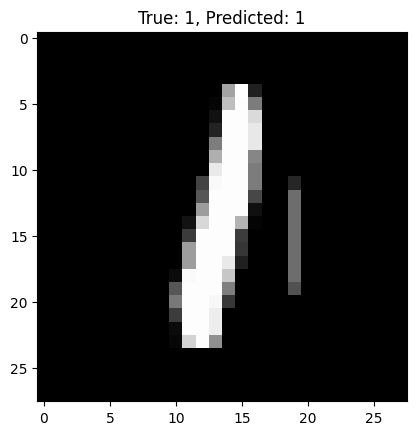

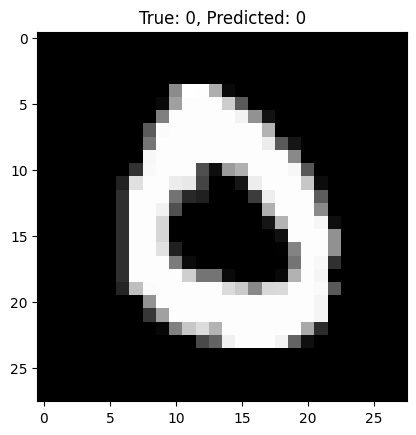

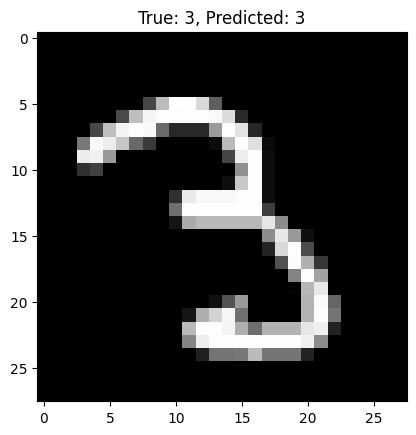

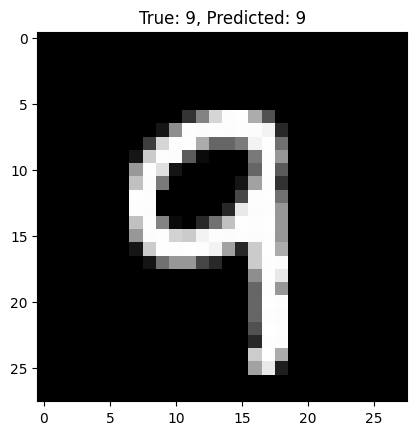

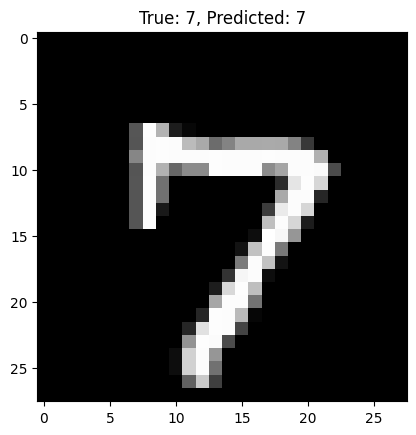

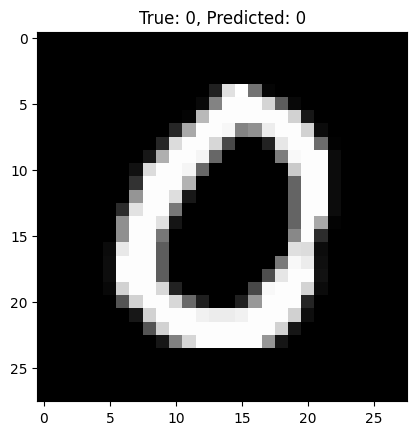

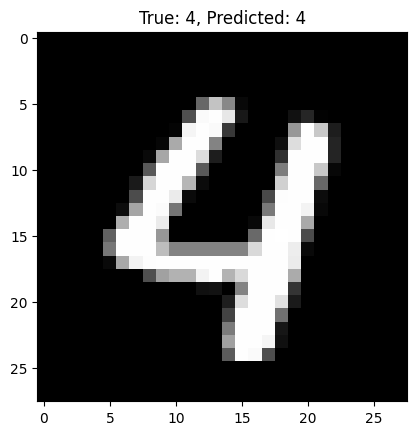

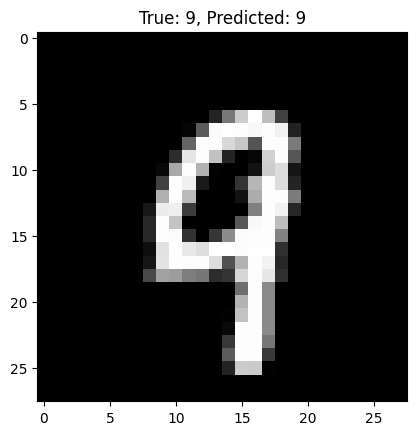

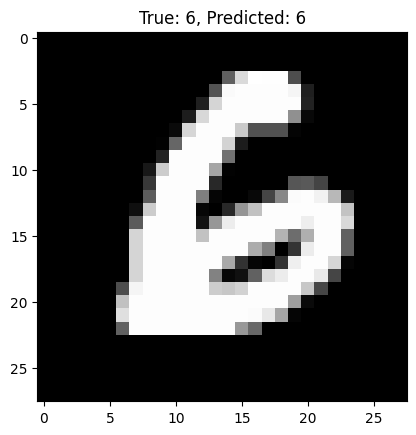

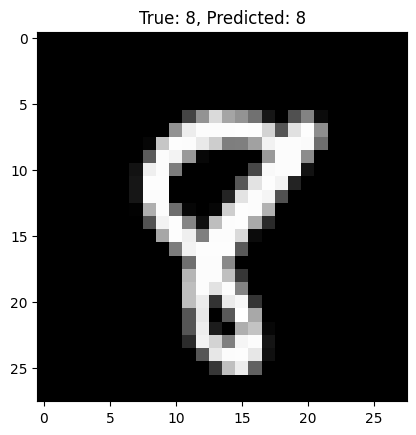

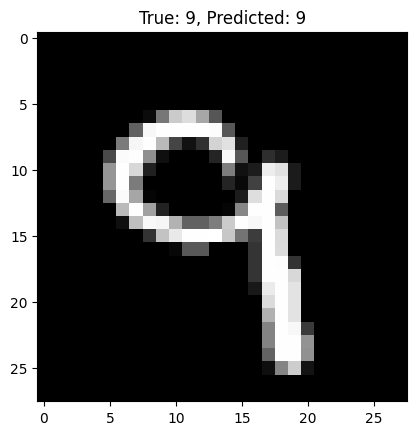

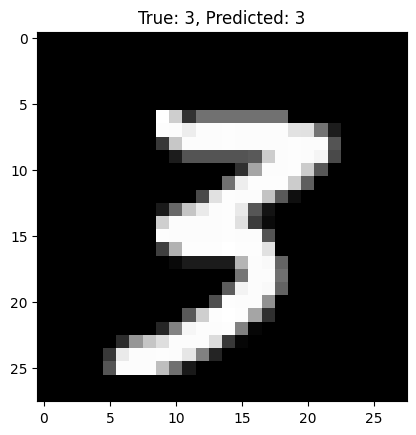

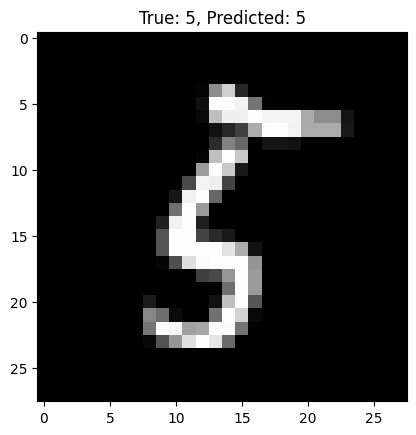

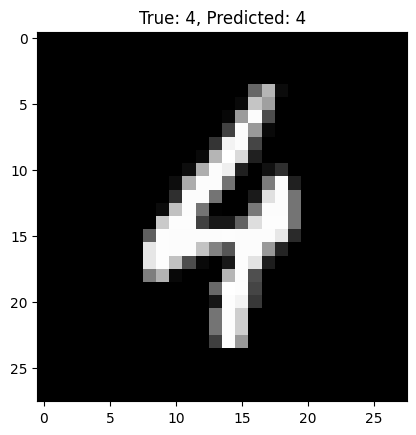

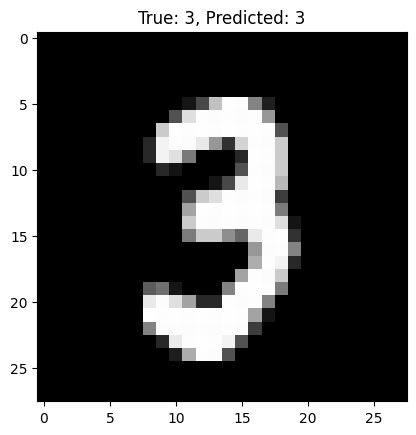

In [14]:
for input_batch, label_batch in ds_test.take(1):
    # Make predictions
    predictions = model.predict(input_batch)

    # Convert the predictions and labels to numpy arrays
    predicted_labels = tf.argmax(predictions, axis=1).numpy()
    true_labels = label_batch.numpy()

    # Display the input images and their predicted labels
    for i in range(len(true_labels)):
        plt.imshow(input_batch[i].numpy().reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
        plt.show()